# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [28]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [6]:
y = len(pd.unique(df['YEAR']))
print(y)

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [17]:
MI = df[df["STATE"] == "MICHIGAN"]
OH = df[df["STATE"] == "OHIO"]
MIavg = MI["AVG_MATH_8_SCORE"].mean()
OHavg = OH["AVG_MATH_8_SCORE"].mean()

if MIavg > OHavg:
    print("MI has the higher average across all years")
else:
    print("OH has the higher average across all years")

OH has the higher average across all years


Find the average for your chosen test across all states in 2019

In [18]:
df[df["YEAR"] == 2019]
states2019 = df2019.groupby("STATE")
states2019["AVG_MATH_8_SCORE"].mean()

STATE
ALABAMA                 269.0
ALASKA                  274.0
ARIZONA                 280.0
ARKANSAS                274.0
CALIFORNIA              276.0
COLORADO                285.0
CONNECTICUT             286.0
DELAWARE                277.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   292.0
FLORIDA                 279.0
GEORGIA                 279.0
HAWAII                  275.0
IDAHO                   286.0
ILLINOIS                283.0
INDIANA                 286.0
IOWA                    282.0
KANSAS                  282.0
KENTUCKY                278.0
LOUISIANA               272.0
MAINE                   282.0
MARYLAND                280.0
MASSACHUSETTS           294.0
MICHIGAN                280.0
MINNESOTA               291.0
MISSISSIPPI             274.0
MISSOURI                281.0
MONTANA                 284.0
NATIONAL                282.0
NEBRASKA                285.0
NEVADA                  274.0
NEW_HAMPSHIRE           287.0
NEW_JERSEY              292.0
NEW_

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [93]:
# Indicates how much money is spent in total per student. Higher expenditure could lead to more study resources and hence performances
df['EXPENDITURE_PER_STUDENT'] = (df['INSTRUCTION_EXPENDITURE'] + df['SUPPORT_SERVICES_EXPENDITURE'])/ df['ENROLL_ALL']
# Indicates what percent of the total revenue was spent on education. Indirectly indicates which states prioritize education, and whether that correlates to better student performance
df['EXPENDITURE_PERCENT_OF_REVENUE'] = ((df['INSTRUCTION_EXPENDITURE'] + df['SUPPORT_SERVICES_EXPENDITURE'])/ df['TOTAL_REVENUE'])

df['Portion of Eighth Graders'] = df['ENROLL_8']/ df['ENROLL_ALL']

Feature engineering justification: See comments in code

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'Expenditure Per Student vs. 8th Grade Math Scores')

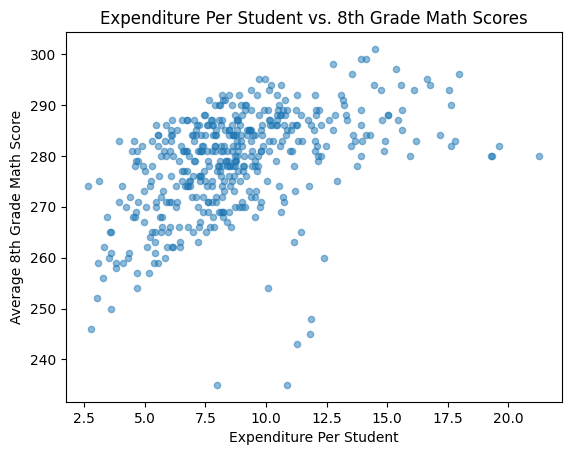

In [94]:
df.plot.scatter(x='EXPENDITURE_PER_STUDENT', y="AVG_MATH_8_SCORE", alpha=0.5)
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average 8th Grade Math Score')
plt.title("Expenditure Per Student vs. 8th Grade Math Scores")

**<The graph above depicts the correlation between expenditure per student and test scores>**

**The Graph Above Depicts Correlation between the Expenditure Per Student and Average 8th Grade Math Scores**

Text(0.5, 1.0, 'Portion of Eighth Graders vs. 8th Grade Math Scores')

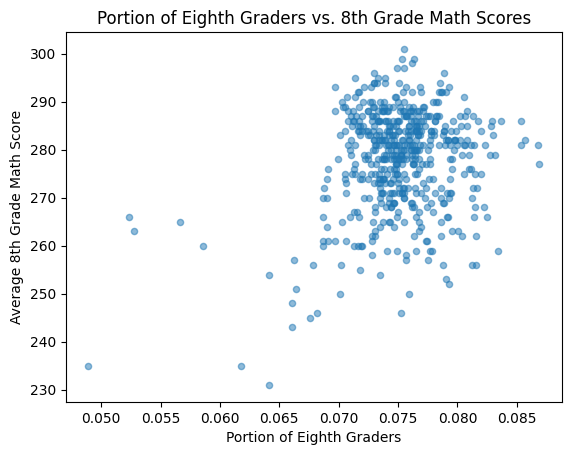

In [97]:
df.plot.scatter(x='Portion of Eighth Graders', y="AVG_MATH_8_SCORE", alpha=0.5)
plt.xlabel('Portion of Eighth Graders')
plt.ylabel('Average 8th Grade Math Score')
plt.title("Portion of Eighth Graders vs. 8th Grade Math Scores")

**The graph above depicts any correlation between expenditure as % of revenue and test scores**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [38]:
from sklearn.model_selection import train_test_split

In [145]:
X = df[['EXPENDITURE_PER_STUDENT','Portion of Eighth Graders', 'AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [147]:
# import your sklearn class here
from sklearn.linear_model import ElasticNet

In [148]:
# create your model here
model = ElasticNet()

In [149]:
model.fit(X_train, y_train)

ElasticNet()

In [150]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [151]:
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))

0.8579820749127617
0.5636417229065447
3.2770004450522836


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

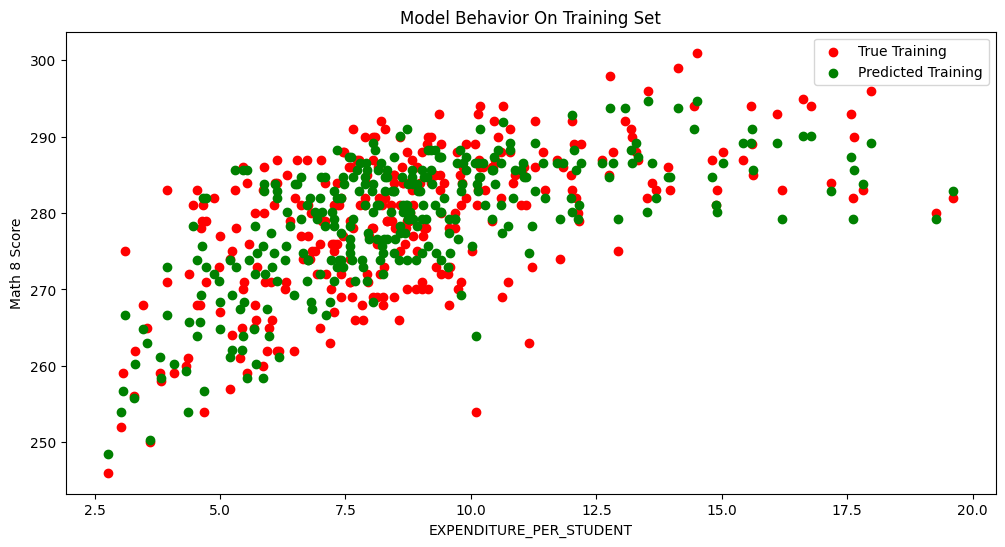

In [155]:
col_name = 'EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

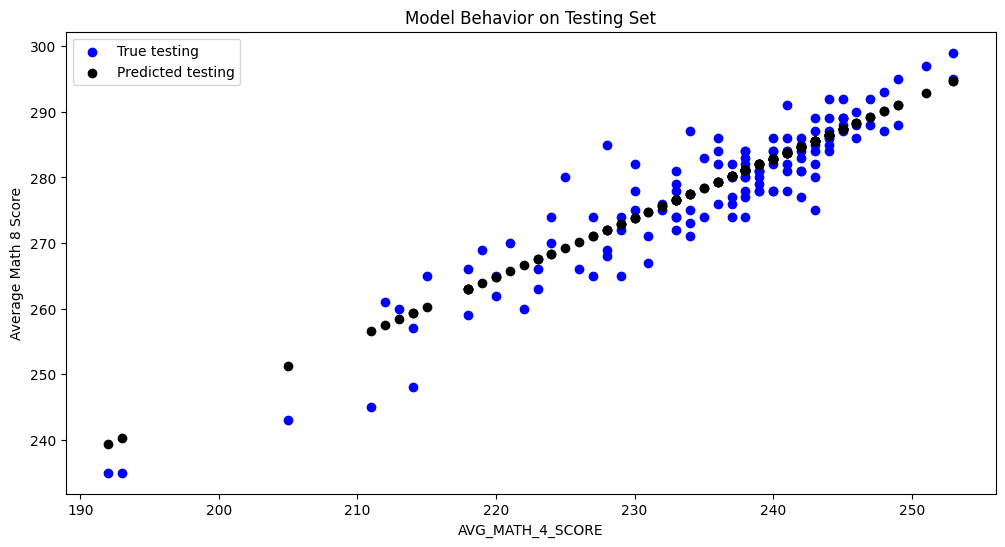

In [157]:
col_name = "AVG_MATH_4_SCORE"
f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**The first step of my work was better understanding my data and choosing a variable I wanted to examine more closely. I created a few statistics myself that I believed could be reliable indicators of students' performance in math. This was then used to train a machine learning model. The model performaed quite well on the test set with an accuracy of 85%. I chose the ElasticNet architecture since it is likely better at detect small subtleties in the data than the linear regression model is**